![](./assets/images/s1-0-0_data_analytics_workflow.png)

# Step1 - Data Analytics Workflow
### Boston Housing: Predicting Boston Housing Prices(https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation)
#### Study general workflow for Predictive Analytics with Boston Housing Dataset

# Learning Plan

### Lesson 1-1: Overview - Data Analytics Workflow

### Lesson 1-2: Exploratory Data Analysis

### Lesson 1-3: Preprocessing

### Lesson 1-4: Model Selection

### Lesson 1-5: Model Evaluation & Prediction


# Lesson 1-1: Overview - Data Analytics Workflow

## Data Science vs. Data Analytics

![](https://www.gangboard.com/blog/wp-content/uploads/2019/02/difference-between-data-science-and-data-analytics.png)
[reference blog](https://www.gangboard.com/blog/difference-between-data-science-and-data-analytics/)

## Data Science is Multidisciplinary

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Data-Science-vs.-Data-Analytics-vs.-Machine-Learning1.jpg)

[reference blog](https://www.simplilearn.com/data-science-vs-data-analytics-vs-machine-learning-article)

## <font color="blue">Data Science</font> can be seen as an incorporation of multiple parental disciplines, 
## including <font color="green">data analytics</font>, software engineering, data engineering, machine learning, predictive analytics, business analytics, and more. 

## What is Data Analytics?

## <font color="green">Data Analytics</font> refers to the statistical analysis of data to come up with business-essential information and solve problems. The process may comprise of cleaning, transformation, and modeling of data.

## 2 types of Data Analytics

* Descriptive Analytics
* Predictive Analytics

## Descriptive Analytics

It refers to building models that provide an insight in current and historical data and show the performance of the company in various areas such as finance, inventory, customers etc. However, <font color="red">it does not give insights regarding future</font>, which brings us to the second type – Predictive Analytics.

## Predictive Analytics

It is used to make informed decisions utilizing historical data such as which type of customers to target or which product can be more profitable.

## 2가지 type 중에서 <font color="red">Predictive Analytics</font> 에 대해서 알아 본다.

## Workflow for Predictive Analytics

일반적인 예측 분석 프로젝트(Predictive Analytics)는 다음과 같은 프로세스를 따른다.

![Workflow](https://files.slack.com/files-pri/T25783BPY-F5XB4JW5D/workflow.png?pub_secret=2ce52c9fab)


### 1단계 : 탐색적 자료 분석 (EDA : Exploratory Data Analysis)

시각화와 기술 통계(Descriptive statistics)를 통해서 데이터를 이해하는 단계이다.

### 2단계 : 전처리 (Preprocessing)

데이터를 정제하고 가공해서 머신 러닝 모델의 입력에 적합한 형태로 바꿔주는 단계이다.

- Data Cleaning
  - Deduplication
  - Outlier detection
  - Other cleaning techniques

- For model
  - Feature extraction
  - Feature scaling
  - Dummification
  - Dimensionality reduction

탐색적 자료 분석과 전처리는 순차적이라기 보다 반복적인 관계이다. EDA를 통해 어떤 전처리가 필요한지 알 수 있고 전처리를 통해 EDA를 수월하게 할 수 있다.

### 3단계 : 모델 선택 (Model selection)

적절한 머신 러닝 모델을 선택하는 단계이다.

- 무엇을 선택할 것인가
  - Model
  - Features
  - Hyperparameters


- 어떻게 선택할 것인가
  - Metrics
  - Validation
  - Cross Validation (CV)


### 4단계 : 평가 및 예측 (Evaluation & Prediction)

만들어진 머신 러닝 모델의 성능을 평가하고 모델을 활용하여 새로운 데이터에 대한 예측을 하는 단계이다.

- 만들어진 모델이 얼마나 새로운 데이터에 대해 얼마나 일반화 (generalization) 가능한지 측정할 수 있다.
- 평가용 데이터셋은 모델 선택과 학습 과정에서 쓰이지 않아야 한다.
- 평가용 데이터셋은 학습용 데이터셋과 동일한 전처리 과정을 거쳐야 한다.


## Workflow Example

이 예제에서는 보스턴 집값 데이터를 단순한 방식으로 예측하는 프로젝트를 Workflow에 맞춰서 수행해 본다.


### Load Data

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

데이터명 : Boston Housing Price (보스턴 주택 가격 데이터) 
레코드수 : 506 개 
필드개수 :  14 개 

데이터설명 : 보스턴 시의 주택 가격에 대한 데이터이다. 
주택의 여러가진 요건들과 주택의 가격 정보가 포함되어 있다. 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용될 수 있다. 회귀분석 등의 분석에 활용될 수 있다. 

보스턴 주택 데이터는 여러 개의 측정지표들 (예를 들어, 범죄율, 학생/교사 비율 등)을 포함한, 보스턴 인근의 주택 가격의 중앙값(median value)이다. 이 데이터 집합은 14개의 변수를 포함하고 있다. 


필드의 이해 : 
데이터의 이해를 돕기 위해 포함된 14개의 변수에 대하여 간략하게 설명한다.  
위 14개의 필드는 입력 변수로 사용 가능하고, 맨 아래의 MEDV이 목표(종속) 변수로 사용된다. 


- [01]  CRIM	자치시(town) 별 1인당 범죄율
- [02]  ZN	25,000 평방피트를 초과하는 거주지역의 비율
- [03]  INDUS	비소매상업지역이 점유하고 있는 토지의 비율
- [04]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- [05]  NOX	10ppm 당 농축 일산화질소
- [06]  RM	주택 1가구당 평균 방의 개수
- [07]  AGE	1940년 이전에 건축된 소유주택의 비율
- [08]  DIS	5개의 보스턴 직업센터까지의 접근성 지수
- [09]  RAD	방사형 도로까지의 접근성 지수
- [10]  TAX	10,000 달러 당 재산세율
- [11]  PTRATIO	자치시(town)별 학생/교사 비율
- [12]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- [13]  LSTAT	모집단의 하위계층의 비율(%)
- [14]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)


출처: https://ai-times.tistory.com/431 [ai-times]

In [2]:
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)


In [3]:
data['MEDV'] = boston.target

MEDV 값이 우리가 예측하려는 집값이다.



먼저, 모델의 평가를 위해 학습용 데이터셋(Training dataset)과 평가용 데이터셋(Test dataset)을 나눈다.

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data)

파이썬의 머신 러닝 라이브러리인 scikit-learn에서 제공하는 함수를 사용했다. 이 함수가 하는 역할은 단순히 데이터셋를 무작위로 둘로 쪼개 주는 것이다. 이 때 비율은 평가용 데이터셋이 25%를 차지하도록 했다. 기본값이 25%이므로 생략해도 결과는 같다.

# Lesson 1-2: Exploratory Data Analysis

## 전처리 (Preprocessing)

### 변수 살펴보기

In [5]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34,14.3
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4


### 변수 하나에 대해 그래프 그리기

In [6]:
%matplotlib inline

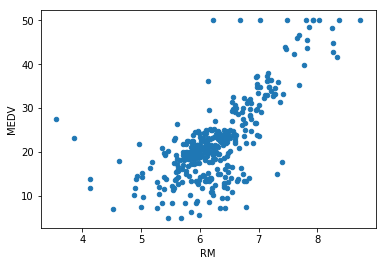

In [7]:
train_data.plot.scatter(x='RM', y='MEDV')

In [8]:
import cufflinks
cufflinks.go_offline()

In [9]:
train_data.RM.iplot(kind='hist')

RM 변수는 3.5 ~ 8.7 사이에 있다는 것을 알 수 있다.

In [10]:
train_data.MEDV.iplot(kind='hist')

MEDV 변수는 5 ~ 50 사이에 있다.

### 두 변수 간의 관계 보기

RM과 MEDV 사이의 관계 보기

In [11]:
train_data.iplot(x='RM', y='MEDV', mode='markers')

### 여러 변수 간의 관계 보기

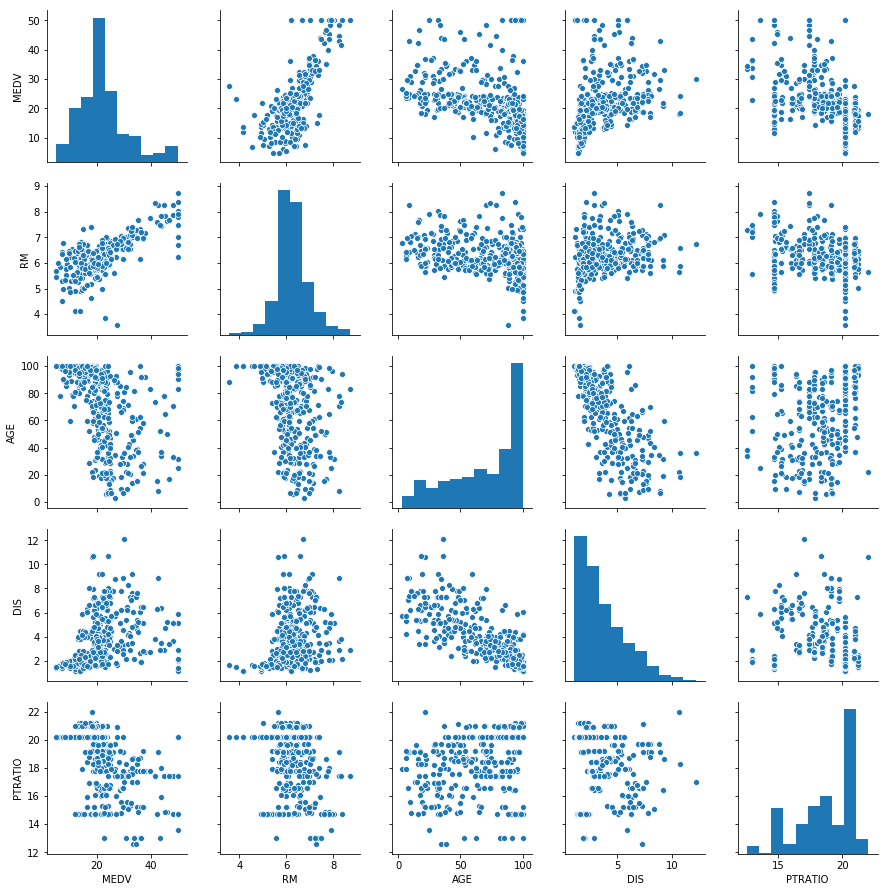

In [12]:
%matplotlib inline
import seaborn as sns

sns.pairplot(train_data[["MEDV", "RM", "AGE", "DIS", "PTRATIO"]]);

# Lesson 1-3: 전처리 (Preprocessing)

## 전처리 (Preprocessing)

이 데이터셋은 잘 정제된 데이터셋이기 때문에 중복된 값이나 불량 데이터가 없다. 따라서 여기서는 Feature scaling 정도의 간단한 전처리만을 수행해보자.

### Feature scaling

- 0~1 사이에 맞추기
    - 최솟값을 빼고 (최댓값 - 최솟값)으로 나눈다.
    - 최댓값은 1이 되고, 최솟값은 0이 된다.
- 표준화(Standardization)하기
    - 평균을 빼고 표준편차로 나눈다.
    - 원래 분포가 정규분포인 경우 평균이 0이고 표준편차가 1인 표준정규분포로 바뀐다.
    - 대부분의 값이 -2 ~ 2 사이에 위치한다.

이 예시에서는 표준화(Standardization)를 쓴다.

### 학습 데이터셋의 전처리 과정에서 사용한 매개변수(parameter)는 테스트에서 동일하게 사용해야 한다. 이 예시에서는 학습 데이터셋에서 구한 변수의 평균과 표준편차를 저장해놓고 테스트에서 동일하게 사용할 것이다.

### Standardization

In [13]:
RM_mean = train_data.RM.mean()
RM_std = train_data.RM.std()

MEDV_mean = train_data.MEDV.mean()
MEDV_std = train_data.MEDV.std()

processed_data = (train_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6,0.230903,0.049059
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34,14.3,-0.904015,-0.863019
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6,-1.243035,-0.280608
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5,-0.432587,-0.181708
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4,0.098496,0.246859


# Lesson 1-4: Model Selection

## 모델 선택 (Model selection)

예측 모델은 생각할 수 있는 가장 간단한 모델을 사용한다. 즉, RM_standard 값의 $\theta_1$배가 MEDV_standard라고 예측한다. $\theta_1$은 1.2로 정한다. 나중에는 이 값을 사람이 직접 정하지 않고 머신 러닝 알고리즘을 이용해 학습하는 방법을 소개할 것이다.

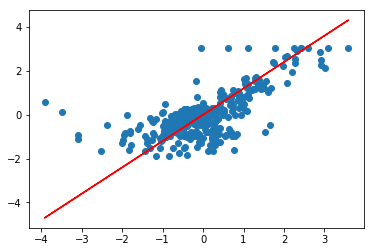

In [14]:
from matplotlib import pyplot as plt
import numpy as np

x = processed_data.RM_standard
y = processed_data.MEDV_standard
theta_1 = 1.2
y_hat = theta_1 * x

plt.scatter(x=x, y=y)
plt.plot(x, y_hat, 'r');

# Lesson 1-5: Model Evaluation & Prediction

## 1-5-1 : 평가 및 예측 (Evaluation & Prediction)

모델의 평가는 모델이 학습된 학습용 데이터셋이 아니라 모델이 아직 보지 못한 평가용 데이터셋으로 한다. 모델이 새로운 데이터에 대해 얼마나 일반화하여 적용할 수 있는지 평가하는 것이 목적이기 때문이다.

먼저, 평가용 데이터셋을 학습용 데이터셋과 동일한 방식으로 전처리하여야 한다. 이 때 파라미터들은 학습용 데이터셋에서 구한 값을 사용한다.

In [15]:
processed_test_data = (test_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6,1.316351,1.038058
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3,-0.176503,-0.313575
262,0.52014,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91,48.8,3.113305,2.928147
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64,22.7,-0.588275,0.060047
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6,-0.332191,-0.610275


전처리된 평가용 데이터셋을 이용해 우리가 예측하고자 하는 변수의 예측값을 만든다.

In [16]:
x_test = processed_test_data.RM_standard
y_test = processed_test_data.MEDV_standard
y_hat_test = theta_1 * x_test

모델을 평가하기 위해서는 기준이 필요하다. 회귀 문제(Regression problem)에서 가장 널리 쓰이는 평가 방법은 잔차 제곱의 합(RSS: Residual Sum of Squares)이다. 잔차 제곱의 합을 계산하는 방법은 실제값과 예측값의 차이를 제곱하여 모두 더하는 것이다. 여기서는 데이터 갯수에 따른 차이를 피하기 위해 RSS를 데이터 갯수로 나누어준다. 또한 그 값을 다시 2로 나눈다. (2로 나누는 이유는 계산을 쉽게 하기 위해서임).

$$RSS = \frac{1}{2n}\sum^n_{i=1} (y^{(i)} - \hat{y}^{(i)})^2$$

먼저, 학습용 데이터셋에서의 RSS를 구해보면 다음과 같다.

In [17]:
residual = y - y_hat
n = len(x)
RSS = 1/(2*n) * (residual ** 2).sum()
RSS

0.36488439053414906

이제 평가용 데이터셋에서의 RSS를 구해보자.

In [18]:
residual_test = y_test - y_hat_test
n_test = len(x_test)
RSS_test = 1/(2*n_test) * (residual_test ** 2).sum()
RSS_test

0.5059317787737083

학습용 데이터셋에서의 지표와 평가용 데이터셋에서의 지표 간의 차이는 나중에 모델의 성능을 이해하는 데 중요한 역할을 할 것이다.

## 1-5-2 : 회귀 성능 평가 지표 (Regression Metrics)

다음 데이터를 가지고 회귀 성능을 평가해 봅시다.

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [20]:
y_test = [3,5,7,10,12,7,13]
y_predict = [5.11111111, 6.35947712, 6.35947712, 8.85620915, 11.35294118, 5.11111111, 13.8496732 ]

In [21]:
mae_score = mean_absolute_error(y_test, y_predict) #오차의 절대값에 대한 중앙값
mse_score = mean_squared_error(y_test, y_predict) #평균 제곱 오차 (MSE, Mean Squared Error, 오차의 제곱에 대한 평균) #오차 = 실제 값 - 예측 값 
rmse_score = np.sqrt(mean_squared_error(y_test, y_predict)) #RMSE (root mean squared error)
msle_score = mean_squared_log_error(y_test, y_predict) #MSLE
rmsle_score = np.sqrt(mean_squared_log_error(y_test, y_predict)) #RMSLE (root mean squared log error) #https://wikidocs.net/23095
rsquare_score = r2_score(y_test, y_predict) #결정 계수 (R^2)
ev_score = explained_variance_score(y_test, y_predict)  

In [22]:
mae_score, mse_score, rmse_score, msle_score, rmsle_score, rsquare_score, ev_score

(1.23436041,
 1.8188608755742302,
 1.348651502640408,
 0.045566521326910976,
 0.2134631615218677,
 0.842536779323079,
 0.842536779323079)

![](https://i.imgur.com/DT4H1Yk.jpg)

refer to https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [23]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

In [24]:
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
Y = boston_df['MEDV']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### 1-5-2-1 : MAE(Mean Absolute Error)

![](https://i.imgur.com/BmBC8VW.jpg)

![](https://i.imgur.com/tqnei6J.jpg)

#### Calculate MAE

In [26]:
# Perform the intial fitting to get the LinearRegression object
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X, Y)

mae_sum = 0
for y, x in zip(Y, X.values):
    prediction = lm.predict(x.reshape(1,2))
    mae_sum += abs(y - prediction)
mae = mae_sum / len(Y)

print(mae)

[3.95258007]


### 1-5-2-2 : MSE(Mean Square Error)

![](https://i.imgur.com/vB3UAiH.jpg)

![](https://i.imgur.com/mLn8AeW.jpg)

#### Calculate MSE

In [27]:
mse_sum = 0
for y, x in zip(Y, X.values):
    prediction = lm.predict(x.reshape(1,2))
    mse_sum += (y - prediction)**2
mse = mse_sum / len(Y)

print(mse)

[30.51246878]


### Problem of outliers(이상치 문제)

#### outliers(이상치)를 고려해야 하는 모델인 경우 MSE를 사용하고 그렇지 않은 경우 MAE를 사용할 것!!!

### Variant of MSE
- RMSE
- MSLE
- RMSLE
- R2 Score
- Explained Variance Score

#### RMSE(Root Mean Square Error) 

![](https://lh4.googleusercontent.com/GD-CcmSDeb1ficAt41u0ZDtFd7syTpJGc_NJ3NGTlQtY-rikX7Tqn9DMaG4b5JtWlKOI6RBayJZNxr4h5SHL2SeKX9ceQCLj9uGTuqeAfgS0EDjh20oZnImahJ2oUa3up9E7KjI)

- square root of the MSE
- MSE 값이 0에서 무한대에 이르기 때문에 MSE값이 높아질 경우 Square Root 하여 측정 기준과 유사한 단위로 변환하여 모델의 해석력을 높힙니다.

#### MSLE(Mean Squared Logarithmic Error) 

![](https://peltarion.com/static/msle_01.png)

- 예측값과 실제값이 모두 매우 큰 숫자일 때 예측값과 실제값의 큰 차이에 대해 패널티를 주지 않아야 하는 모델인 경우 주로 사용됩니다

#### RMSLE(Root Mean Squared Logarithmic Error) 

![](https://cdn-images-1.medium.com/max/1600/1*VjNfaSRuj3FIMcKA0yJAGg.png)

- square root of the RMSLE

#### R2(R Squared = Coefficient of Determination) score

![](https://cdn-images-1.medium.com/max/1600/1*iqUOveJbbKk7-DHcQ0ZOnA@2x.png)

![](https://cdn-images-1.medium.com/max/1600/1*SZVKM6G8v8veQPqmO1c2Aw@2x.png)

- y with a bar is the mean of the observed y
- Scale-free : 예측값과 실제값이 모두 매우 크거나, 매우 작은 숫자일 때도 강건함. 
- 수치가 높을 수록 모델의 성능이 좋음

#### Explained Variance Score

![](https://image.slidesharecdn.com/3rdpsgrouppresentation-180109094942/95/statisticscorrelation-and-regression-analysis-16-638.jpg?cb=1515492372)

R2 = 1 - [(Sum of Squared Residuals / n) / Variance(Y_actual)]

Explained Variance Score = 1 - [Variance(Y_predicted - Y_actual) / Variance(Y_actual)]

- Variance(Y_predicted - Y_actual) = (Sum of Squared Residuals - Mean Error) / n 
- When The Mean Error = Zero, R2 = Explained Variance Score
- 수치가 높을 수록 모델의 성능이 좋음

![](https://slideplayer.com/slide/6259570/21/images/4/Variation+About+a+Regression+Line.jpg)

### 1-5-2-3 : MPE(Mean Percentage Error)

![](https://i.imgur.com/ndIXERr.jpg)

![](https://i.imgur.com/kTIYRBX.jpg)

#### Calculate MPE

In [28]:
mpe_sum = 0
for y, x in zip(Y, X.values):
    prediction = lm.predict(x.reshape(1,2))
    mpe_sum += ((y - prediction)/y)
mpe = mpe_sum/len(Y)

print(mpe)

[-0.05204662]


### 1-5-2-4 : MAPE(Mean Absolute Percentage Error)

![](https://i.imgur.com/YYMpqUY.jpg)

![](https://i.imgur.com/HPlrPmu.jpg)

#### Calculate MAPE

In [29]:
mape_sum = 0
for y, x in zip(Y, X.values):
    prediction = lm.predict(x.reshape(1,2))
    mape_sum += (abs((y - prediction))/y)
mape = mape_sum/len(Y)

print(mape)

[0.20753843]


## 1-5-3 : 분류 성능 평가 지표 (Classification Metrics)

다음 데이터를 가지고 분류 성능을 평가해 봅시다.

In [30]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['malignant'] = 1 - breast_cancer.target # 0 for malignant and 1 for benign in the original dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

데이터명
- Wisconsin Diagnostic Breast Cancer (WDBC)
- 위스콘신 유방암 진단 데이터

레코드수
- 569 개
컬럼개수
- 32개 (ID, 진단결과, 30개의 실측값)

데이터 설명
- 위스콘신 대학교에서 제공한 유방암 진단결과 데이터 입니다.
- 머신러닝에서 knn, classification 등의 예제로 자주 사용됩니다.


주요 컬럼 설명
![](./assets/images/s1-5-3-1_wisconsin_diagnostic_breast_cancer_desc.png)


In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

data_train, data_test = train_test_split(data, test_size= 20)

In [32]:
lr = LogisticRegression()
lr.fit(data_train[['mean radius', 'mean texture']], data_train['malignant'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_true = data_test['malignant']
y_pred = lr.predict(data_test[['mean radius', 'mean texture']])

In [34]:
np.stack([y_pred, y_true], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]])

### 1-5-3-1 : 혼동 행렬(Confusion Matrix)

혼동행렬(Confusion Matrix)은 정확도보다 더 자세한 정보를 보여준다.

![](https://image.slidesharecdn.com/5-180206050322/95/5model-evaluation-and-improvementepoch2-2-11-638.jpg?cb=1517893429)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[9, 0],
       [5, 6]])

In [36]:
pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,9,0
Actual Positive,5,6


In [37]:
y_true_animal = ["cat", "dog", "dog", "cat", "rabbit", "rabbit"]
y_pred_animal = ["dog", "dog", "cat", "cat", "rabbit", "rabbit"]
confusion_matrix(y_true_animal, y_pred_animal, labels=["dog", "rabbit", "cat"])

array([[1, 0, 1],
       [0, 2, 0],
       [1, 0, 1]])

### 1-5-3-2 : 정확도(Accuracy)

가장 일반적으로 쓰이는 지표. 직관적으로 이해하기 쉽다.

전체 중에 맞춘 것의 비율.

$$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.75

### 정확도의 문제점

원래 클래스 비율이 한 쪽으로 치우쳐져 있을 때는 제대로 평가하기 어렵다. 
* 클래스 불균형 데이터 세트(class-imbalanced data set)

두 클래스의 라벨이 서로 크게 다른 빈도를 보이는 이진 분류 문제입니다. 예를 들어 질병 데이터 세트에서 0.0001의 예가 긍정 라벨을 가지고 0.9999의 예가 부정 라벨을 가진다면 클래스 불균형 문제에 해당하지만, 축구 시합 예측에서 예 중 0.51은 한 팀이 이길 것으로, 0.49는 다른 팀이 이길 것으로 라벨이 지정되었다면 클래스 불균형 문제가 아닙니다.

In [39]:
dumb_y_pred = np.zeros(len(y_true))
accuracy_score(y_true, dumb_y_pred)

0.45

### 1-5-3-3 : 정밀도 (Precision)
* 클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 데이터 수의 비율
* 맞다고 한 것 중 실제로 맞은 비율

$$\text{precision} = \frac{TP}{TP + FP} = \frac{TP}{Predicted\_Positives}$$

### 1-5-3-4 : 재현율 (Recall)
* 클래스에 실제로 속한 데이터 중에 클래스에 속한다고 예측한 비율
 
$$\text{recall} = \frac{TP}{TP + FN} = \frac{TP}{Actual\_Positives} $$

### 1-5-3-5 : 위양성률 (Fall-Out)
* FPR (False Positive Rate)
* 실제 클래스에 속하지 않는 데이터 중에 클래스에 속한다고 예측한 비율
 
$$\text{fallout} = \frac{FP}{FP + TN}$$

### 1-5-3-6 : F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* beta가 1일 때 F1 score라고 하며,
* 불균형 클래스 문제에서 정확한 평가를 위해 가장 자주 쓰이는 지표이다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

#### Classification report

In [40]:
from sklearn.metrics import classification_report

In [41]:
target_names = ['benign', 'malignannt']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.64      1.00      0.78         9
  malignannt       1.00      0.55      0.71        11

   micro avg       0.75      0.75      0.75        20
   macro avg       0.82      0.77      0.74        20
weighted avg       0.84      0.75      0.74        20



### 1-5-3-7 : ROC Curve

ROC 곡선(Receiver Operator Characteristic Curve) 커브는 클래스 판별 기준값(thereshold)의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.

- 지금까지 threshold는 0.5로 가정했지만 threshold가 바뀜에 따라 긍정 예측과 부정 예측 비율을 조절할 수 있다.
- 극단적인 경우, threshold가 0이면 모두 긍정으로 예측한다.
- 이 경우 Recall은 1이 되지만 Fall-Out 역시 1이 된다. 
- 반대로 threshold가 1이라면 모두 부정으로 예측한다.
- 이 경우 Recall은 0이 되고 Fall-Out 역시 0이 된다.
- threshold의 변화에 따라 Recall과 Fall-out의 변화를 그려놓은 것이 ROC curve이다.

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별 함수(discriminant function)를 가지며 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

Scikit-Learn 의 Classification 클래스는 다음처럼 판별 함수 값을 계산하는 decision_function 메서드를 제공한다.

In [42]:
lr.decision_function(data_test[['mean radius', 'mean texture']])

array([-0.14164653, -1.60049769, -1.97717223,  2.79146701, -2.30982285,
       -0.79911941,  3.15524455, -0.11390237, -0.34197064, -1.30181262,
       -1.19261902,  0.82029391, -0.92640213,  3.1672097 ,  0.48457741,
        0.52438879, -0.74571713, -0.92212164, -1.14050711, -1.81084923])

In [43]:
lr.predict_proba(data_test[['mean radius', 'mean texture']])

array([[0.53535254, 0.46464746],
       [0.83208793, 0.16791207],
       [0.8783794 , 0.1216206 ],
       [0.05778703, 0.94221297],
       [0.9096873 , 0.0903127 ],
       [0.68978608, 0.31021392],
       [0.04088513, 0.95911487],
       [0.52844485, 0.47155515],
       [0.58466914, 0.41533086],
       [0.78613989, 0.21386011],
       [0.76720915, 0.23279085],
       [0.30570127, 0.69429873],
       [0.71634479, 0.28365521],
       [0.0404185 , 0.9595815 ],
       [0.38117182, 0.61882818],
       [0.37182656, 0.62817344],
       [0.67824477, 0.32175523],
       [0.71547421, 0.28452579],
       [0.75777273, 0.24222727],
       [0.85946448, 0.14053552]])

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, lr.decision_function(data_test[['mean radius', 'mean texture']]))

In [45]:
fpr, tpr

(array([0.        , 0.        , 0.        , 0.11111111, 0.11111111,
        0.22222222, 0.22222222, 1.        ]),
 array([0.        , 0.09090909, 0.63636364, 0.63636364, 0.90909091,
        0.90909091, 1.        , 1.        ]))

In [46]:
thresholds

array([ 4.1672097 ,  3.1672097 , -0.11390237, -0.14164653, -0.79911941,
       -0.92212164, -0.92640213, -2.30982285])

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

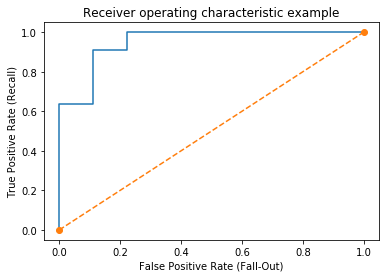

In [48]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'o--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#### Scikit-Learn에서 만들어진 모형은 기본적으로 정확도(accuracy)를 최대화하는 모형이다. 하지만 정확도, 정밀도, 재현도 등의 성능이 동일한 모형도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있다.

In [49]:
from sklearn.svm import SVC


lr = LogisticRegression()
svc = SVC(gamma=0.0001, C=3000, probability=True)


lr.fit(data_train[['mean radius', 'mean texture']], data_train['malignant'])
y_pred1 = lr.predict(data_test[['mean radius', 'mean texture']])

svc.fit(data_train[['mean radius', 'mean texture']], data_train['malignant'])
y_pred2 = svc.predict(data_test[['mean radius', 'mean texture']])

In [50]:
print(confusion_matrix(y_true, y_pred1))

[[9 0]
 [5 6]]


In [51]:
print(confusion_matrix(y_true, y_pred2))

[[8 1]
 [3 8]]


In [52]:
print(classification_report(y_true, lr.predict(data_test[['mean radius', 'mean texture']])))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.55      0.71        11

   micro avg       0.75      0.75      0.75        20
   macro avg       0.82      0.77      0.74        20
weighted avg       0.84      0.75      0.74        20



In [53]:
print(classification_report(y_true, svc.predict(data_test[['mean radius', 'mean texture']])))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.89      0.73      0.80        11

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



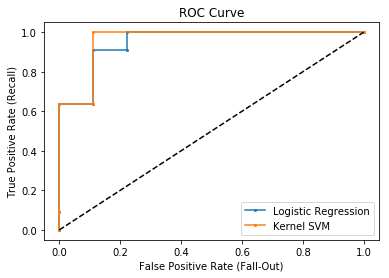

In [57]:
fpr1, tpr1, thresholds1 = roc_curve(y_true, lr.decision_function(data_test[['mean radius', 'mean texture']]))
fpr2, tpr2, thresholds2 = roc_curve(y_true, svc.decision_function(data_test[['mean radius', 'mean texture']]))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

### 1-5-3-8 : AUC (Area Under the Curve)

ROC curve의 아래의 면적. 1에 가까울 수록 좋은 모델이다.

In [55]:
from sklearn.metrics import auc
auc(fpr1, tpr1)

0.9494949494949495

In [56]:
auc(fpr2, tpr2)

0.9595959595959596